#Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_json("/content/drive/MyDrive/News_Category_Dataset_v2.json", lines=True)

In [ ]:
df.head()

category                                           headline  \
0          CRIME  There Were 2 Mass Shootings In Texas Last Week...   
1  ENTERTAINMENT  Will Smith Joins Diplo And Nicky Jam For The 2...   
2  ENTERTAINMENT    Hugh Grant Marries For The First Time At Age 57   
3  ENTERTAINMENT  Jim Carrey Blasts 'Castrato' Adam Schiff And D...   
4  ENTERTAINMENT  Julianna Margulies Uses Donald Trump Poop Bags...   

           authors                                               link  \
0  Melissa Jeltsen  https://www.huffingtonpost.com/entry/texas-ama...   
1    Andy McDonald  https://www.huffingtonpost.com/entry/will-smit...   
2       Ron Dicker  https://www.huffingtonpost.com/entry/hugh-gran...   
3       Ron Dicker  https://www.huffingtonpost.com/entry/jim-carre...   
4       Ron Dicker  https://www.huffingtonpost.com/entry/julianna-...   

                                   short_description       date  
0  She left her husband. He killed their children... 2018-05-26  
1                           Of course it has a song. 2018-05-26  
2  The actor and his longtime girlfriend Anna Ebe... 2018-05-26  
3  The actor gives Dems an ass-kicking for not fi... 2018-05-26  
4  The "Dietland" actress said using the bags is ... 2018-05-26

#Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200853 entries, 0 to 200852
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   category           200853 non-null  object        
 1   headline           200853 non-null  object        
 2   authors            200853 non-null  object        
 3   link               200853 non-null  object        
 4   short_description  200853 non-null  object        
 5   date               200853 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.2+ MB


In [ ]:
df.columns

Index(['category', 'headline', 'authors', 'link', 'short_description', 'date'], dtype='object')

In [ ]:
len(df['category'].value_counts())

41

In [ ]:
pd.DataFrame(df['category'].value_counts())

category
POLITICS           32739
WELLNESS           17827
ENTERTAINMENT      16058
TRAVEL              9887
STYLE & BEAUTY      9649
PARENTING           8677
HEALTHY LIVING      6694
QUEER VOICES        6314
FOOD & DRINK        6226
BUSINESS            5937
COMEDY              5175
SPORTS              4884
BLACK VOICES        4528
HOME & LIVING       4195
PARENTS             3955
THE WORLDPOST       3664
WEDDINGS            3651
WOMEN               3490
IMPACT              3459
DIVORCE             3426
CRIME               3405
MEDIA               2815
WEIRD NEWS          2670
GREEN               2622
WORLDPOST           2579
RELIGION            2556
STYLE               2254
SCIENCE             2178
WORLD NEWS          2177
TASTE               2096
TECH                2082
MONEY               1707
ARTS                1509
FIFTY               1401
GOOD NEWS           1398
ARTS & CULTURE      1339
ENVIRONMENT         1323
COLLEGE             1144
LATINO VOICES       1129
CULTURE & ARTS      1030
EDUCATION           1004

In [ ]:
top_10_categories = df['category'].value_counts().index[:10]
df = df[df['category'].isin(top_10_categories)]

In [ ]:
df['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
FOOD & DRINK       6226
BUSINESS           5937
Name: category, dtype: int64

In [ ]:
df.shape

(120008, 6)

In [ ]:
df['headline'].nunique()

119181

In [ ]:
df['headline'].value_counts()

Sunday Roundup                                                                                            90
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                                    59
Best Parenting Tweets: What Moms And Dads Said On Twitter This Week                                       33
Weekly Roundup of eBay Vintage Clothing Finds                                                             23
Fashionably Late Style Quiz: Test Your Knowledge Of This Week's Fashion News!                             17
                                                                                                          ..
Samuel L. Jackson Didn't Know He Was In A Feud With Donald Trump                                           1
Christie hits back: Rubio can’t ‘slime his way to the White House’                                         1
Nicholas Caldwell, Singer With The Whispers, Dead At 71                                                    1
‘Steven Universe’ F

In [ ]:
df['short_description'].value_counts()

                                                                                                                                    9285
Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day.                              192
The stress and strain of constantly being connected can sometimes take your life -- and your well-being -- off course. GPS           125
Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do         91
Health stories you may have missed.                                                                                                   29
                                                                                                                                    ... 
"This issue is bigger than just about me."                                                                                             1
A Texas sheriff’s department released an 

In [ ]:
df['headline'].value_counts()

Sunday Roundup                                                                                            90
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                                    59
Best Parenting Tweets: What Moms And Dads Said On Twitter This Week                                       33
Weekly Roundup of eBay Vintage Clothing Finds                                                             23
Fashionably Late Style Quiz: Test Your Knowledge Of This Week's Fashion News!                             17
                                                                                                          ..
Samuel L. Jackson Didn't Know He Was In A Feud With Donald Trump                                           1
Christie hits back: Rubio can’t ‘slime his way to the White House’                                         1
Nicholas Caldwell, Singer With The Whispers, Dead At 71                                                    1
‘Steven Universe’ F

In [ ]:
df[df['short_description'] == 'Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day.']

category                                          headline authors  \
51112  POLITICS  HuffPost Rise: What You Need To Know On August 9           
51228  POLITICS  HuffPost Rise: What You Need To Know On August 8           
51435  POLITICS  HuffPost Rise: What You Need To Know On August 5           
51569  POLITICS  HuffPost Rise: What You Need To Know On August 4           
51662  POLITICS  HuffPost Rise: What You Need To Know On August 3           
...         ...                                               ...     ...   
78329  POLITICS        HuffPost Rise Morning Newsbrief, October 5           
78611  POLITICS        HuffPost Rise Morning Newsbrief, October 2           
78666  POLITICS        HuffPost Rise Morning Newsbrief, October 1           
78758  POLITICS     HuffPost Rise Morning Newsbrief, September 30           
78970  POLITICS     HuffPost Rise Morning Newsbrief, September 28           

                                                    link  \
51112  https://www.huffingtonpost.com/entry/huffpost-...   
51228  https://www.huffingtonpost.com/entry/huffpost-...   
51435  https://www.huffingtonpost.com/entry/huffpost-...   
51569  https://www.huffingtonpost.com/entry/huffpost-...   
51662  https://www.huffingtonpost.com/entry/huffpost-...   
...                                                  ...   
78329  https://www.huffingtonpost.com/entry/huffpost-...   
78611  https://www.huffingtonpost.com/entry/huffpost-...   
78666  https://www.huffingtonpost.com/entry/huffpost-...   
78758  https://www.huffingtonpost.com/entry/huffpost-...   
78970  https://www.huffingtonpost.com/entry/huffpost-...   

                                       short_description       date  
51112  Welcome to the HuffPost Rise Morning Newsbrief... 2016-08-09  
51228  Welcome to the HuffPost Rise Morning Newsbrief... 2016-08-08  
51435  Welcome to the HuffPost Rise Morning Newsbrief... 2016-08-05  
51569  Welcome to the HuffPost Rise Morning Newsbrief... 2016-08-04  
51662  Welcome to the HuffPost Rise Morning Newsbrief... 2016-08-03  
...                                                  ...        ...  
78329  Welcome to the HuffPost Rise Morning Newsbrief... 2015-10-05  
78611  Welcome to the HuffPost Rise Morning Newsbrief... 2015-10-02  
78666  Welcome to the HuffPost Rise Morning Newsbrief... 2015-10-01  
78758  Welcome to the HuffPost Rise Morning Newsbrief... 2015-09-30  
78970  Welcome to the HuffPost Rise Morning Newsbrief... 2015-09-28  

[192 rows x 6 columns]

In [ ]:
df['authors'].value_counts()

                                                                                                   20699
Cole Delbyck                                                                                        1126
Reuters, Reuters                                                                                    1111
Julia Brucculieri                                                                                   1019
Curtis M. Wong                                                                                       997
                                                                                                   ...  
Karen Roter Davis, ContributorSilicon Valley tech executive and advisor. Wife and mother. En...        1
Bill Blum, ContributorLawyer, retired judge, novelist, columnist @truthdig and lectu...                1
Sarah Bunton, ContributorMother, Feminist, Animal Rights Activist, LGBTQA Ally, Cogniti...             1
Krishna Das and Angel Grant, Contributors              

In [ ]:
len(df[df['authors'] == ""])

20699

In [ ]:
df.drop(['authors','link','date'],axis=1,inplace=True)

In [ ]:
df.drop_duplicates(subset=['short_description','headline'],keep='first',inplace=True)

In [ ]:
df['headline'].value_counts()

Sunday Roundup                                                                                            90
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                                    28
Weekly Roundup of eBay Vintage Clothing Finds                                                             17
The Moment I Knew                                                                                         16
Wardrobe Malfunctions Photos: See This Week's Almost-Dangerous Outfits (PHOTOS)                           14
                                                                                                          ..
Donald Trump Has Some Thoughts About Obama's Tears                                                         1
Chipotle Slapped With Subpoena Over Virus Outbreak                                                         1
Thanks, Obama, For Confirming That It's Totally Fine For Powerful Men To Cry                               1
11 Million Sign Up 

In [ ]:
len(df) 

119804

In [ ]:
len(df[(df['short_description'] == "") & (df['headline'] == "")])

1

In [ ]:
len(df[df['headline'] == ""])

1

In [ ]:
df = df[(df['short_description']!="") & (df['headline']!="")]

In [ ]:
len(df)

110531

In [ ]:
df['short_description'].value_counts()

Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day.                             192
The stress and strain of constantly being connected can sometimes take your life -- and your well-being -- off course. GPS          125
Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do        91
Health stories you may have missed.                                                                                                  29
Want more HuffPost Style beauty content? Check us out on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostBeauty       27
                                                                                                                                   ... 
The situation resembles what top political analysts would deem a "crap storm."                                                        1
Viacom Inc. is exploring a sale of a minority st

In [ ]:
df['short_description'].nunique()

109046

In [ ]:
df[df['short_description'] == 'The stress and strain of constantly being connected can sometimes take your life -- and your well-being -- off course. GPS']['category'].value_counts()

WELLNESS    125
Name: category, dtype: int64

In [ ]:
df[df['short_description'] == 'Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do']['category'].value_counts()

STYLE & BEAUTY    91
Name: category, dtype: int64

In [ ]:
df['headline'].nunique() 

109923

In [ ]:
df['headline'].value_counts()

Sunday Roundup                                                                                            90
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                                    28
Weekly Roundup of eBay Vintage Clothing Finds                                                             17
The Moment I Knew                                                                                         16
Wardrobe Malfunctions Photos: See This Week's Almost-Dangerous Outfits (PHOTOS)                           14
                                                                                                          ..
Kesha Praises Gaga For 'Bringing Attention To Sexual Assault At The Oscars'                                1
Alicia Vikander Wins Oscar For Best Supporting Actress                                                     1
Hey, Bernie, Vermont Is Not Enough: Your Guide To Super Tuesday's Challenges                               1
Chris Rock's Monolo

In [ ]:
hl = pd.DataFrame(df['headline'].value_counts())
hl.head()

headline
Sunday Roundup                                            90
Weekly Roundup of eBay Vintage Clothing Finds (...        28
Weekly Roundup of eBay Vintage Clothing Finds             17
The Moment I Knew                                         16
Wardrobe Malfunctions Photos: See This Week's A...        14

In [ ]:
hl.values

array([[90],
       [28],
       [17],
       ...,
       [ 1],
       [ 1],
       [ 1]])

In [ ]:
value_list = hl.values.tolist()
value_list

[[90],
 [28],
 [17],
 [16],
 [14],
 [9],
 [8],
 [7],
 [5],
 [5],
 [4],
 [4],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [3],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],
 [2],

In [ ]:
value_list = np.array(value_list)
value_list = value_list.flatten()
value_list

array([90, 28, 17, ...,  1,  1,  1])

In [ ]:
hl.index

Index(['Sunday Roundup',
       'Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)',
       'Weekly Roundup of eBay Vintage Clothing Finds', 'The Moment I Knew',
       'Wardrobe Malfunctions Photos: See This Week's Almost-Dangerous Outfits (PHOTOS)',
       'Wardrobe Malfunctions: See This Week's Almost-Dangerous Outfits (PHOTOS)',
       'Best Parenting Tweets: What Moms And Dads Said On Twitter This Week',
       'Parenthesis: The Best Of The Mom And Dad Blogs This Week',
       'What To Watch On Amazon Prime That’s New This Week',
       'What To Watch On Hulu That’s New This Week',
       ...
       'Lizzy Klaniecki's GPS Guide For Handing Conflict',
       'One-Third Of All U.S. Presidents Appointed A Supreme Court Justice In An Election Year',
       'The Real Winner At This Year’s Academy Awards Was #OscarsSoWhite',
       'Donald Trump Could Learn Something From Joe Biden About Dealing With Protesters',
       'Senate Takes First Real Step Toward Combating Heroin Epidemic

In [ ]:
index_list = hl.index.tolist()
index_list

['Sunday Roundup',
 'Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)',
 'Weekly Roundup of eBay Vintage Clothing Finds',
 'The Moment I Knew',
 "Wardrobe Malfunctions Photos: See This Week's Almost-Dangerous Outfits (PHOTOS)",
 "Wardrobe Malfunctions: See This Week's Almost-Dangerous Outfits (PHOTOS)",
 'Best Parenting Tweets: What Moms And Dads Said On Twitter This Week',
 'Parenthesis: The Best Of The Mom And Dad Blogs This Week',
 'What To Watch On Amazon Prime That’s New This Week',
 'What To Watch On Hulu That’s New This Week',
 'Ikea Bag Dress Is Massive, In Need Of A Good Steam (PHOTOS)',
 'Here Are The Movies Coming To Netflix This Week',
 'Letting Go',
 'Mid-Week Motivation: Inspiration To Overcome The Wednesday Slump',
 "Keira Knightley Vogue Cover Feels Like Something We've Seen Before (PHOTO)",
 'The Biggest Queer Wellness Stories Of The Week',
 'Ask Airfarewatchdog: Your Air Travel Questions Answered',
 'Watch The 2016 Democratic National Convention Live',
 'The 1 G

In [ ]:
value_list = np.array(value_list)
index_list = np.array(index_list)
temp = pd.DataFrame({'number': value_list, 'headline': list(index_list)}, columns=['number', 'headline'])

In [ ]:
temp.head(10)

number                                           headline
0      90                                     Sunday Roundup
1      28  Weekly Roundup of eBay Vintage Clothing Finds ...
2      17      Weekly Roundup of eBay Vintage Clothing Finds
3      16                                  The Moment I Knew
4      14  Wardrobe Malfunctions Photos: See This Week's ...
5       9  Wardrobe Malfunctions: See This Week's Almost-...
6       8  Best Parenting Tweets: What Moms And Dads Said...
7       7  Parenthesis: The Best Of The Mom And Dad Blogs...
8       5  What To Watch On Amazon Prime That’s New This ...
9       5         What To Watch On Hulu That’s New This Week

In [ ]:
len(temp)

109923

In [ ]:
temp = temp[temp['number'] > 1]
len(temp)

414

In [ ]:
def ret_more_categories(dataframe, news_data):
    
    for i in range(0, len(dataframe)):

        headline = dataframe.iloc[i]['headline']

        df_category = news_data[news_data['headline'] == headline]
        
        unique_categories =  df_category['category'].unique()
        v = len(unique_categories)
        
        news_data = news_data[(news_data['headline'] != headline)]

        if v > 0:
            for i in range(0, v):

                first = df_category[(df_category['headline'] == headline) & (df_category['category'] == unique_categories[i])].iloc[0]

                news_data = news_data.append({'category' : unique_categories[i], 'headline' : headline, 'short_description': first['short_description']}, ignore_index = True)
            
        else:
            v= 0
        
    return news_data

In [ ]:
df = ret_more_categories(temp, df)

In [ ]:
df[df['headline'] == 'Sunday Roundup']

category        headline  \
109509  POLITICS  Sunday Roundup   

                                        short_description  
109509  This week the nation came one step closer to g...

In [ ]:
df[df['headline'] == 'The Moment I Knew']['category'].value_counts()

WELLNESS    1
Name: category, dtype: int64

# Text Pre-Processing

In [ ]:
#convert to lower case

df['category'] = df['category'].apply(lambda x: str(x).lower())
df['headline'] = df['headline'].apply(lambda x: str(x).lower())
df['short_description'] = df['short_description'].apply(lambda x: str(x).lower())

In [ ]:
df.sample(5)

category                                           headline  \
82654       wellness  a steadfast commitment to end the tobacco epid...   
8218        politics  gold star family promised $25,000 by trump fin...   
83067      parenting  mya's beatboxing tutorial: 'twinkle twinkle' h...   
39971       politics  community solar brings renewable energy 'to th...   
42090  entertainment  leah remini blames scientology for children's ...   

                                       short_description  
82654  for far too long, tobacco use has remained the...  
8218   “we want you to know how grateful we are for t...  
83067         the dance moves are pretty impressive too.  
39971  for the three-quarters of u.s. households that...  
42090                     "you're not treated as a kid."

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
"you're": "you are",
"you'll": "you will",
"you've": "you have",
"you'd": "you would",
"you'd've": "you would have",
"you'll've": "you will have",
"here's" : "here is",
"there's" : "there is",
"where's": "where is"
}

In [ ]:
def conv_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [ ]:
df['headline'] = df['headline'].apply(lambda x: conv_to_exp(x))
df['short_description'] = df['short_description'].apply(lambda x: conv_to_exp(x))

In [ ]:
import re 

In [ ]:
df['headline'] = df['headline'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))
df['short_description'] = df['short_description'].apply(lambda x: re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x))

In [ ]:
df['headline'] = df['headline'].apply(lambda x: re.sub(r'[^\w ]+', "", x))
df['short_description'] = df['short_description'].apply(lambda x: re.sub(r'[^\w ]+', "", x))

In [ ]:
df['headline'] = df['headline'].apply(lambda x: ' '.join(x.split()))
df['short_description'] = df['short_description'].apply(lambda x: ' '.join(x.split()))

In [ ]:
import unicodedata

def remove_accented_char(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return x

In [ ]:
df['headline'] = df['headline'].apply(lambda x: remove_accented_char(x))
df['short_description'] = df['short_description'].apply(lambda x: remove_accented_char(x))

remove stopwords

In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [ ]:
# removing stopwords

df['headline'] = df['headline'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))
df['short_description'] = df['short_description'].apply(lambda x: ' '.join([t for t in x.split() if t not in stopwords]))

In [ ]:
df.sample(5)

category                                           headline  \
109378  style & beauty                                  q10 carol woolton   
74049        parenting  qing chen pharmacy worker dad rescues baby awn...   
9903          politics                taking supper trump need long spoon   
36858         politics  faa privatization bill contains sweetheart dea...   
98395   style & beauty         ombre free got haircolor trend home photos   

                                        short_description  
109378  growing cheap quartz watches costume jewelry i...  
74049   grabbed baby awning came tears baby big old to...  
9903                      deals president dont tweetcycle  
36858   house transportation committee chair actual sw...  
98395   ombre hairstyle kicking fashionable set years ...

tokenization & lemmatization

In [ ]:
import nltk
nltk.download('wordnet')

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def lemmatize_tokenize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [ ]:
#create new columns

df['headline_lemmatized_tokenized'] = df.headline.apply(lemmatize_tokenize_text)
df['short_description_lemmatized_tokenized'] = df.short_description.apply(lemmatize_tokenize_text)

In [ ]:
df.sample(5)

category                                           headline  \
374          politics  rex tillerson warns grads living alternative r...   
51945  healthy living  movember momentum mustaches changing mens heal...   
80862        wellness                                        life wakeup   
22750   entertainment  chris martin performs beautiful tribute george...   
17175   entertainment            sheryl crow fearless liberated bit days   

                                       short_description  \
374                                   gee wonder talking   
51945  matter gender movember great way finally allow...   
80862  time present love life love accept right looki...   
22750                     fitting tribute charitable man   
17175                     singer returns roots new album   

                           headline_lemmatized_tokenized  \
374    [rex, tillerson, warns, grad, living, alternat...   
51945  [movember, momentum, mustache, changing, men, ...   
80862                                     [life, wakeup]   
22750  [chris, martin, performs, beautiful, tribute, ...   
17175      [sheryl, crow, fearless, liberated, bit, day]   

                  short_description_lemmatized_tokenized  
374                               [gee, wonder, talking]  
51945  [matter, gender, movember, great, way, finally...  
80862  [time, present, love, life, love, accept, righ...  
22750                [fitting, tribute, charitable, man]  
17175                 [singer, return, root, new, album]

# Data Imbalance

In [ ]:
df['category'].value_counts()

politics          29460
wellness          17775
entertainment     13451
travel             9384
style & beauty     9153
parenting          8625
food & drink       6212
queer voices       5562
healthy living     5261
business           5071
Name: category, dtype: int64

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

labels = df['category'].value_counts().index
values = df['category'].value_counts().values
colors = df['category']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent", marker = dict(colors = colors))])
fig.show()

In [ ]:
df['category'].value_counts(normalize=True)

politics          0.267930
wellness          0.161659
entertainment     0.122333
travel            0.085345
style & beauty    0.083244
parenting         0.078442
food & drink      0.056496
queer voices      0.050585
healthy living    0.047847
business          0.046119
Name: category, dtype: float64

In [ ]:
value_frame = df['category'].value_counts().to_frame()
last_value = value_frame.iloc[value_frame.shape[0]-1].values[0]
last_value

5071

In [ ]:
import random;

value_frame = df['category'].value_counts().to_frame()
category_number = len(df['category'].value_counts())

for i in range(0, category_number):
    category_name = value_frame.index[i]
    category_indices = df[df['category'] == category_name].index
    row_num = len(category_indices)
    remove_rows_num = row_num - last_value;
    random_indices = random.sample(list(category_indices), remove_rows_num)
    df.drop(random_indices , inplace=True)

In [ ]:
df.reset_index(inplace = True, drop=True)
df.shape[0]

50710

In [ ]:
df['category'].value_counts()

entertainment     5071
politics          5071
queer voices      5071
business          5071
travel            5071
healthy living    5071
wellness          5071
parenting         5071
style & beauty    5071
food & drink      5071
Name: category, dtype: int64

In [ ]:
balanced_values = df['category'].value_counts().values

balanced_fig = go.Figure(data = [go.Pie(labels = labels, values = balanced_values, textinfo = "label+percent", marker = dict(colors = colors))])
balanced_fig.show()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

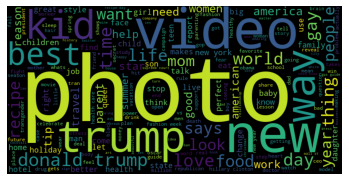

In [ ]:
text = ' '.join(df['headline'])

wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

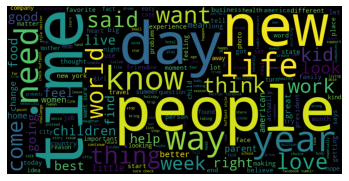

In [ ]:
text = ' '.join(df['short_description'])

wc = WordCloud(width=800, height=400).generate(text)
plt.imshow(wc)
plt.axis('off')
plt.show()

#Unsupervised

In [ ]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_samples, silhouette_score

from sklearn.cluster import MeanShift, estimate_bandwidth

In [ ]:
# Get top labels by calculating average scores for clusters (means), sort them and take top 10 (number_of_labels)

def get_top_labels(data, prediction, number_of_labels):
    dfs = []
    labels = np.unique(prediction)
    for label in labels:
        cluster_index = np.where(prediction==label)
        means = np.mean(data[cluster_index], axis = 0)
        sorted_means = np.argsort(means)[::-1][:number_of_labels]
        features = vectorizer.get_feature_names()
        best_features = [(features[i], means[i], label) for i in sorted_means]
        df3 = pd.DataFrame(best_features, columns = ['features', 'score', 'label'])
        dfs.append(df3)
    return dfs 

* Set categories as labels
* Set data as headline + short_description
* Splitted train-test data as 80%-20% 
* Working with 20 000 samples, because of memory issues

In [ ]:
df_test = df.sample(20000)

df_test.reset_index(inplace = True, drop=True)

y_unsup = df_test['category']
X_unsup = df_test['headline'].values + " " + df_test['short_description'].values

X_unsupervised_train, X_unsupervised_test, y_unsupervised_train, y_unsupervised_test = train_test_split(X_unsup, y_unsup, test_size = 0.2)

In [ ]:
# stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features
# norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1
# min_df is the minimum numbers of documents a word must be present in to be kept

In [ ]:
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', ngram_range=(1, 2), stop_words='english')
X_unsup_train = vectorizer.fit_transform(X_unsupervised_train)
X_unsup_train

<16000x5020 sparse matrix of type '<class 'numpy.float64'>'
	with 197387 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(X_unsup_train.toarray(), columns=vectorizer.get_feature_names()).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



10  10 best  10 reasons  10 things  10 ways  10 years  100  100 percent  \
0  0.0      0.0         0.0        0.0      0.0       0.0  0.0          0.0   
1  0.0      0.0         0.0        0.0      0.0       0.0  0.0          0.0   
2  0.0      0.0         0.0        0.0      0.0       0.0  0.0          0.0   
3  0.0      0.0         0.0        0.0      0.0       0.0  0.0          0.0   
4  0.0      0.0         0.0        0.0      0.0       0.0  0.0          0.0   

   1000  101  ...  youngest  youre  youth  youtube  youve  zealand  zen  zika  \
0   0.0  0.0  ...       0.0    0.0    0.0      0.0    0.0      0.0  0.0   0.0   
1   0.0  0.0  ...       0.0    0.0    0.0      0.0    0.0      0.0  0.0   0.0   
2   0.0  0.0  ...       0.0    0.0    0.0      0.0    0.0      0.0  0.0   0.0   
3   0.0  0.0  ...       0.0    0.0    0.0      0.0    0.0      0.0  0.0   0.0   
4   0.0  0.0  ...       0.0    0.0    0.0      0.0    0.0      0.0  0.0   0.0   

   zoe  zone  
0  0.0   0.0  
1  0.0   0.0  
2  0.0   0.0  
3  0.0   0.0  
4  0.0   0.0  

[5 rows x 5020 columns]

## Top 10 words in our 10 categories - before any training has been done 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



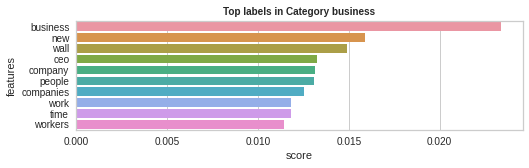

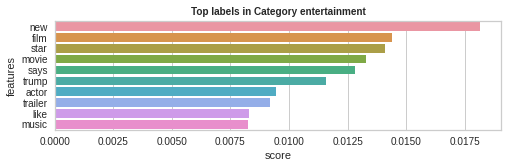

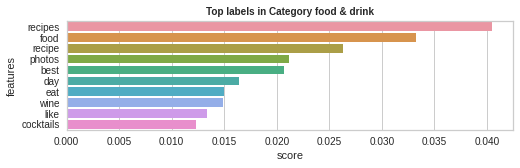

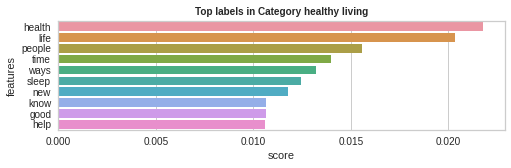

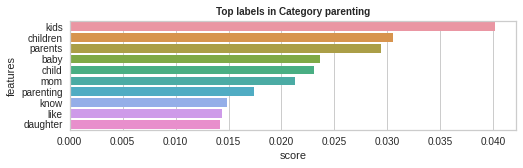

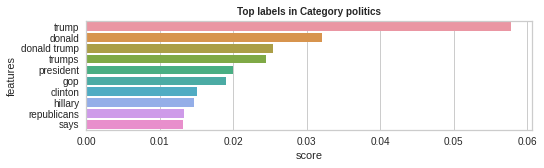

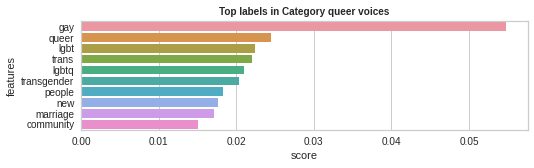

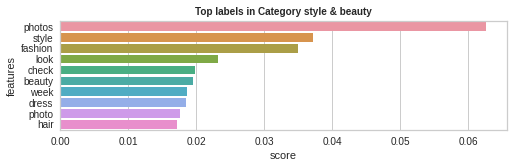

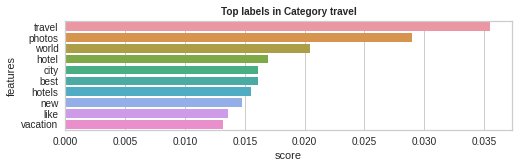

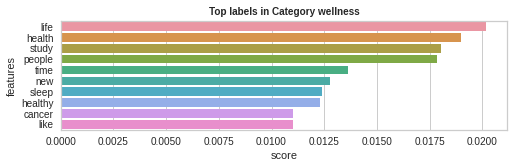

In [ ]:
original_dfs = get_top_labels(X_unsup_train.toarray(), y_unsupervised_train, 10)
for i in range(0, len(original_dfs)):
    plt.figure(figsize=(8, 2))
    plt.title(("Top labels in Category {}".format(original_dfs[i]['label'][0])), fontsize=10, fontweight='bold')
    sns.barplot(x='score', y='features', data= original_dfs[i][:10])

In [ ]:
unsupervised_df = pd.DataFrame({'headline and description': X_unsupervised_train, 'category': y_unsupervised_train})
unsupervised_df.reset_index(inplace = True, drop=True)
unsupervised_df

headline and description        category
0      billionaires big oil flooded mitch mcconnells ...        politics
1      decide career sick kid choice things change qu...  healthy living
2      50 cents expenses spends like birthday include...   entertainment
3      wish aware daughter diagnosed autism hope begi...        wellness
4      8 companies owe employees raise 247 wall st cl...        business
...                                                  ...             ...
15995  3 amazing strategies highly successful highly ...        business
15996  secrets married chef ready drink herbal infuse...    food & drink
15997  lgbt history month 4 queer events october 20 1...    queer voices
15998  16 trends ready goodbye 2014 crayolainspired l...  style & beauty
15999  internet having field day comparing justin bie...   entertainment

[16000 rows x 2 columns]

## 1. K-Means clustering

In [ ]:
!pip install --upgrade kneed

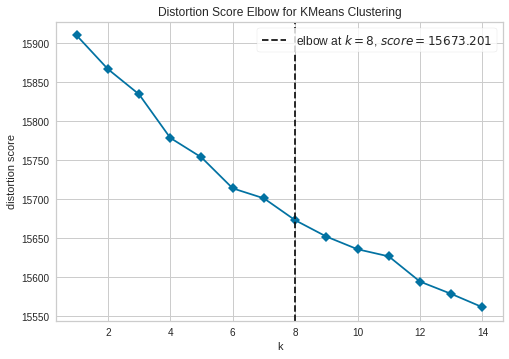

In [ ]:
disortion_model = KMeans()
disortion_visualizer = KElbowVisualizer(disortion_model, k=(1,15), timings=False, locate_elbow=True)
disortion_visualizer.fit(X_unsup_train.toarray())
disortion_visualizer.show()

In [ ]:
k_clusters = disortion_visualizer.elbow_value_
k_clusters

8

### Creating the model with n_clusters = computed clusters (k_clusters) and 

*   List item
*   List item

fitting it to our X data

In [ ]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_unsup_train.toarray())
kmeans = KMeans(n_clusters=k_clusters, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [ ]:
# Creating a new column to display the predicted result (cluster number)
unsupervised_df["k_means_cluster_number"] = prediction
unsupervised_df.head(10)

headline and description        category  \
0  billionaires big oil flooded mitch mcconnells ...        politics   
1  decide career sick kid choice things change qu...  healthy living   
2  50 cents expenses spends like birthday include...   entertainment   
3  wish aware daughter diagnosed autism hope begi...        wellness   
4  8 companies owe employees raise 247 wall st cl...        business   
5  year away presidential election summary whats ...        politics   
6  crayons travel child requires different items ...       parenting   
7  roman polanski accused sexually assaulting 10y...   entertainment   
8  warm onelegged king pigeon pose mastering deep...  healthy living   
9  kanye west kim kardashian provide blueprint tr...   entertainment   

   k_means_cluster_number  
0                       1  
1                       7  
2                       7  
3                       7  
4                       3  
5                       1  
6                       7  
7                       1  
8                       3  
9                       7

### Visualize the clusters  
***

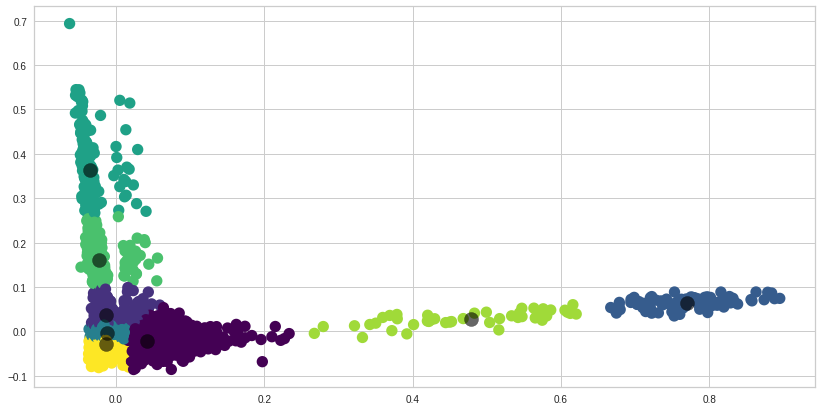

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=40, cmap='viridis', linewidths=5)

centers = fitted.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],c='black', s=200, alpha=0.6);

## Silhouette Score Concepts 
***  

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other.  

The Silhouette Coefficient (sklearn.metrics.silhouette_score) is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with better defined clusters.  
Small coefficient can mean that the clusters are overlapping.

In [ ]:
score = silhouette_score(Y_sklearn, kmeans.labels_, metric='euclidean')
score

0.4227659736846707

# 3) Supervised
***

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

import seaborn as sns

In [ ]:
news_data = df.sample(20000)

In [ ]:
news_data.reset_index(inplace = True, drop=True)
news_data

category                                           headline  \
0         parenting                                          high risk   
1          politics                               long ago fourth july   
2          politics  ted cruz plots government shutdown fight plann...   
3            travel                               15 travel spots 2015   
4      queer voices                 school banned transgender students   
...             ...                                                ...   
19995  queer voices  trans women killed oakland fire struggle respe...   
19996  queer voices    seven half reasons half men scrap gay season 12   
19997  queer voices                    gay conservative think time met   
19998        travel                         stay free super cheap trip   
19999      business              preparing live unknown country future   

                                       short_description  \
0      visit went like visits noticed nurse lingering...   
1      described remains memory split second incident...   
2      said parties want vote defunding family planni...   
3      new york times travel proves entertaining effi...   
4      mount saint charles academy woonsocket rhode i...   
...                                                  ...   
19995  instead grieving friends scout wolfcave spent ...   
19996      good sense humor find laugh gays amusing rest   
19997     far lgbt right tend dismissed mocked demonized   
19998  planning trip especially international difficu...   
19999  googles driverless car siri beginning applied ...   

                           headline_lemmatized_tokenized  \
0                                           [high, risk]   
1                              [long, ago, fourth, july]   
2      [ted, cruz, plot, government, shutdown, fight,...   
3                               [15, travel, spot, 2015]   
4                 [school, banned, transgender, student]   
...                                                  ...   
19995  [trans, woman, killed, oakland, fire, struggle...   
19996  [seven, half, reason, half, men, scrap, gay, s...   
19997              [gay, conservative, think, time, met]   
19998                   [stay, free, super, cheap, trip]   
19999        [preparing, live, unknown, country, future]   

                  short_description_lemmatized_tokenized  
0      [visit, went, like, visit, noticed, nurse, lin...  
1      [described, remains, memory, split, second, in...  
2      [said, party, want, vote, defunding, family, p...  
3      [new, york, time, travel, prof, entertaining, ...  
4      [mount, saint, charles, academy, woonsocket, r...  
...                                                  ...  
19995  [instead, grieving, friend, scout, wolfcave, s...  
19996  [good, sense, humor, find, laugh, gay, amusing...  
19997  [far, lgbt, right, tend, dismissed, mocked, de...  
19998  [planning, trip, especially, international, di...  
19999  [google, driverless, car, siri, beginning, app...  

[20000 rows x 5 columns]

No handles with labels found to put in legend.


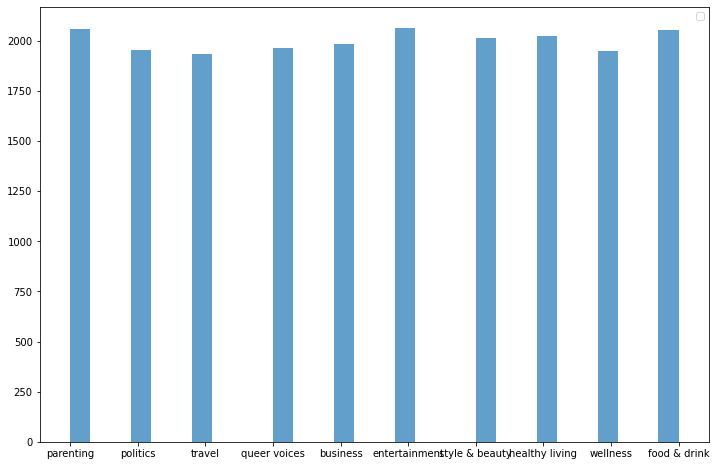

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(news_data['category'], bins = 30, alpha = 0.7)
plt.legend()
plt.show()

In [ ]:
news_data['sum'] = news_data['headline_lemmatized_tokenized'] + news_data['short_description_lemmatized_tokenized']
news_data.sample(5)

category                                           headline  \
8354      business                         hip startups pay women men   
4074  food & drink  chrissy teigen steaming south beach wine food ...   
6472        travel                 irelands 9 memorable hotels photos   
1043  queer voices                      sorry miranda gay mean stupid   
5712  queer voices    butch lesbians open big misconception sex lives   

                                      short_description  \
8354  women earn 77 cents dollar guy makes new compa...   
4074  lee schrager team likes teigen celebrity guest...   
6472  people tend little crazy st paddys day familia...   
1043  gay actually mean stupid attempting redefine w...   
5712                   assume everybody likes different   

                          headline_lemmatized_tokenized  \
8354                    [hip, startup, pay, woman, men]   
4074  [chrissy, teigen, steaming, south, beach, wine...   
6472              [ireland, 9, memorable, hotel, photo]   
1043                [sorry, miranda, gay, mean, stupid]   
5712  [butch, lesbian, open, big, misconception, sex...   

                 short_description_lemmatized_tokenized  \
8354  [woman, earn, 77, cent, dollar, guy, make, new...   
4074  [lee, schrager, team, like, teigen, celebrity,...   
6472  [people, tend, little, crazy, st, paddy, day, ...   
1043  [gay, actually, mean, stupid, attempting, rede...   
5712               [assume, everybody, like, different]   

                                                    sum  
8354  [hip, startup, pay, woman, men, woman, earn, 7...  
4074  [chrissy, teigen, steaming, south, beach, wine...  
6472  [ireland, 9, memorable, hotel, photo, people, ...  
1043  [sorry, miranda, gay, mean, stupid, gay, actua...  
5712  [butch, lesbian, open, big, misconception, sex...

In [ ]:
news_data.reset_index(inplace = True, drop=True)

In [ ]:
# Function to convert   
def listToString(s):  
    
    # initialize an empty string 
    str1 = " " 
    
    # return string   
    return (str1.join(s))

In [ ]:
news_data['sum'] = news_data['sum'].apply(lambda x: ' '.join([str(elem) for elem in x]))
news_data.sample(3)

category                                headline  \
1503           travel        ryanair cheaper probably crowded   
7687        parenting  germany ban elective beauty ops minors   
16189  healthy living                     reluctant alchemist   

                                       short_description  \
1503   planestunning ryanair europes infamously cheap...   
7687   germanys government ban plastic surgery childr...   
16189  life meant lived place referring physical loca...   

                      headline_lemmatized_tokenized  \
1503          [ryanair, cheaper, probably, crowded]   
7687   [germany, ban, elective, beauty, ops, minor]   
16189                        [reluctant, alchemist]   

                  short_description_lemmatized_tokenized  \
1503   [planestunning, ryanair, europe, infamously, c...   
7687   [germany, government, ban, plastic, surgery, c...   
16189  [life, meant, lived, place, referring, physica...   

                                                     sum  
1503   ryanair cheaper probably crowded planestunning...  
7687   germany ban elective beauty ops minor germany ...  
16189  reluctant alchemist life meant lived place ref...

In [ ]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(news_data['sum'])

In [ ]:
X = X.toarray()
X.shape

(20000, 33224)

In [ ]:
y = news_data['category']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 33224), (4000, 33224), (16000,), (4000,))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf1 = LogisticRegression(solver = 'liblinear')

In [ ]:
clf1.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = clf1.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      business       0.71      0.73      0.72       397
 entertainment       0.68      0.79      0.73       413
  food & drink       0.83      0.88      0.86       411
healthy living       0.49      0.41      0.44       405
     parenting       0.74      0.79      0.77       412
      politics       0.76      0.83      0.79       390
  queer voices       0.90      0.69      0.78       392
style & beauty       0.83      0.82      0.82       403
        travel       0.80      0.77      0.79       387
      wellness       0.49      0.52      0.50       390

      accuracy                           0.72      4000
     macro avg       0.72      0.72      0.72      4000
  weighted avg       0.72      0.72      0.72      4000



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[290   9   5  21   9  26   1   3  17  16]
 [  9 328   1   3  16  27   4  13   3   9]
 [  5   7 361   5   6   1   1  10  12   3]
 [ 23  16  15 165  23  10   7   2   8 136]
 [ 10  10   7  17 326   2   4  12   5  19]
 [ 23  12   0   6   7 322   6   3   8   3]
 [  5  41   2   8  27  22 271   6   5   5]
 [ 13  22   4   9   5   5   0 331   7   7]
 [  9  17  21   8   6   3   2  13 298  10]
 [ 21  18  17  95  13   4   5   7   9 201]]


In [ ]:
names = news_data.category.unique()

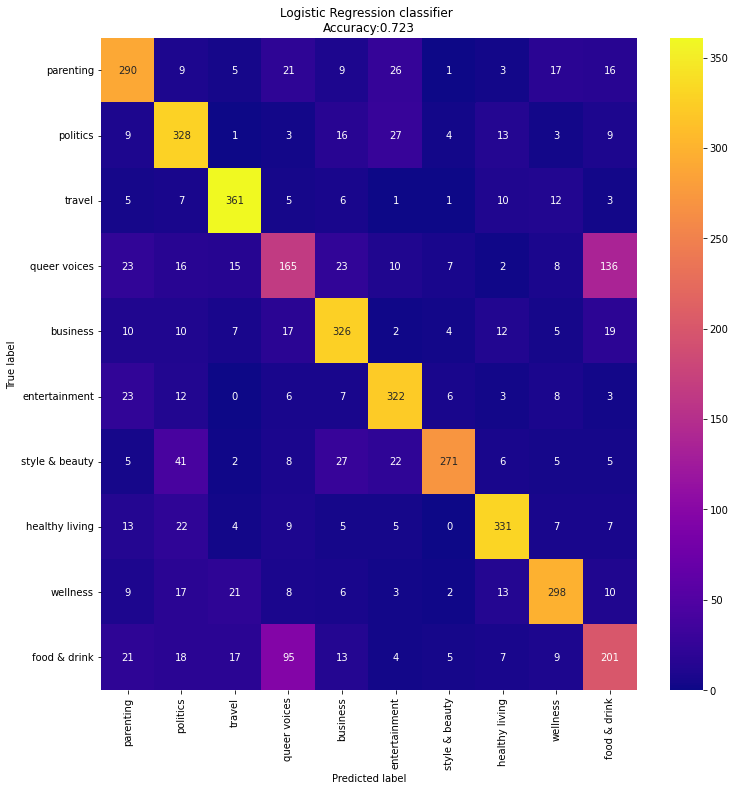

In [ ]:
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = names, 
                     columns = names)

plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True, cmap = 'plasma', fmt='g')
plt.title('Logistic Regression classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [ ]:
clf.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[285  11   9  22   7  25   1   0  15  22]
 [ 12 318   3   6  15  26   8  10   5  10]
 [  6   6 353  10   7   2   0  11  12   4]
 [ 23  15  12 192  22  13   5   3  10 110]
 [ 11   6   7  23 325   3   5  12   3  17]
 [ 17  13   0   8   7 319   9   5   7   5]
 [  8  29   0   4  20  19 295   8   4   5]
 [ 11  14   6   7   9   5   2 334   7   8]
 [ 10  13  21   8   7   5   3   9 303   8]
 [ 17  11  14 105  23  10   8   9  10 183]]


In [ ]:
print(classification_report(y_test, y_pred))

                precision    recall  f1-score   support

      business       0.71      0.72      0.72       397
 entertainment       0.73      0.77      0.75       413
  food & drink       0.83      0.86      0.84       411
healthy living       0.50      0.47      0.49       405
     parenting       0.74      0.79      0.76       412
      politics       0.75      0.82      0.78       390
  queer voices       0.88      0.75      0.81       392
style & beauty       0.83      0.83      0.83       403
        travel       0.81      0.78      0.79       387
      wellness       0.49      0.47      0.48       390

      accuracy                           0.73      4000
     macro avg       0.73      0.73      0.73      4000
  weighted avg       0.73      0.73      0.73      4000



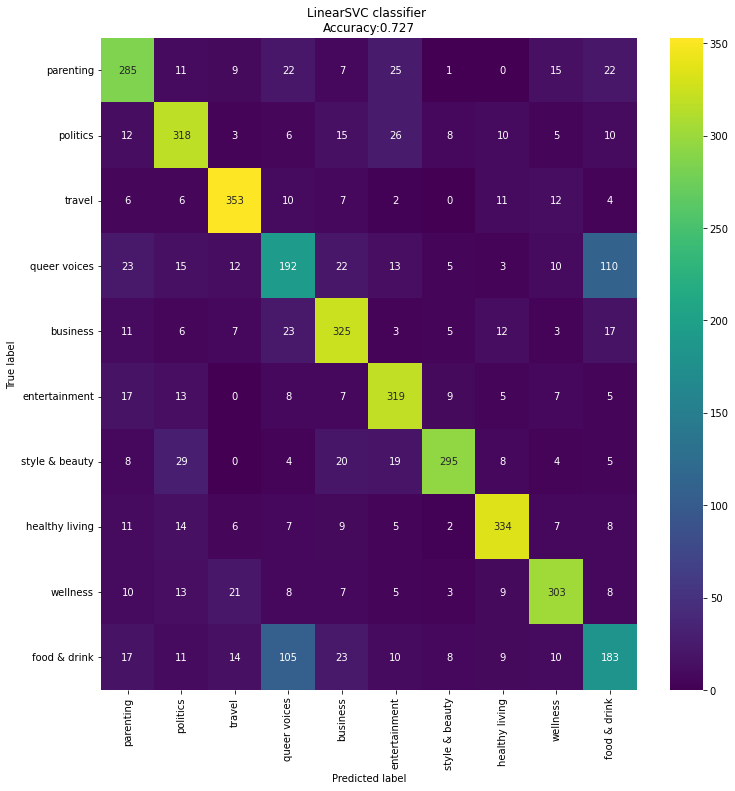

In [ ]:
cm = confusion_matrix(y_test, y_pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = names, 
                     columns = names)

plt.figure(figsize=(12,12))
sns.heatmap(cm_df, annot=True, cmap = 'viridis', fmt='g')
plt.title('LinearSVC classifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()